In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout, MaxPool2D, GlobalMaxPool2D
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [41]:
mnist = tf.keras.datasets.mnist

In [42]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [45]:
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

In [46]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [47]:
# build model using sequential model
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(5, 5), 
                 padding='Same',
                 activation='relu',
                 input_shape=x_train[0].shape))

model.add(Conv2D(filters=32,
                 kernel_size=(5, 5),
                 padding='Same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='Same',
                 activation='relu'))

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='Same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [48]:
# optimizer = RMSprop(learning_rate=0.005, rho=0.9, 
#                     epsilon=1e-08, decay=0.0)

In [49]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [50]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)

In [51]:
epochs = 30
batch_size = 86

In [52]:
data_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

data_generator.fit(x_train)

In [53]:
train_generator = data_generator.flow(x_train, y_train, 
                                      batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [54]:
history = model.fit_generator(train_generator, epochs=epochs,
                              validation_data=(x_test, y_test),
                              verbose=2,
                              steps_per_epoch = steps_per_epoch,
                              callbacks = [learning_rate_reduction])

Epoch 1/30
 - 16s - loss: 0.2705 - accuracy: 0.9129 - val_loss: 0.0418 - val_accuracy: 0.9862
Epoch 2/30
 - 15s - loss: 0.0895 - accuracy: 0.9729 - val_loss: 0.0354 - val_accuracy: 0.9891
Epoch 3/30
 - 15s - loss: 0.0664 - accuracy: 0.9803 - val_loss: 0.0290 - val_accuracy: 0.9910
Epoch 4/30
 - 15s - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0.0248 - val_accuracy: 0.9928
Epoch 5/30
 - 15s - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0175 - val_accuracy: 0.9938
Epoch 6/30
 - 15s - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0192 - val_accuracy: 0.9941
Epoch 7/30
 - 15s - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0201 - val_accuracy: 0.9946
Epoch 8/30
 - 15s - loss: 0.0407 - accuracy: 0.9882 - val_loss: 0.0192 - val_accuracy: 0.9941
Epoch 9/30
 - 16s - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.0159 - val_accuracy: 0.9949
Epoch 10/30
 - 15s - loss: 0.0379 - accuracy: 0.9884 - val_loss: 0.0142 - val_accuracy: 0.9951
Epoch 11/30
 - 15s - loss: 0.0356 - accuracy: 0.9891 - val_

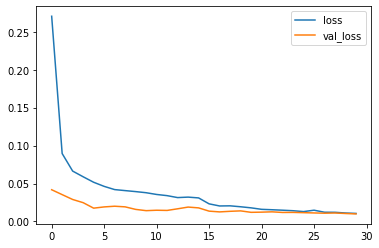

In [55]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

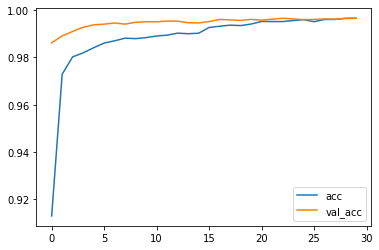

In [56]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 979    0    0    0    0    1    0    0    0    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   0    0 1027    1    0    0    0    4    0    0]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   0    0    0    0  978    0    1    0    0    3]
 [   0    0    0    3    0  888    1    0    0    0]
 [   1    1    0    0    0    0  955    0    1    0]
 [   0    2    2    0    0    0    0 1024    0    0]
 [   0    0    1    2    0    1    0    0  970    0]
 [   0    0    0    0    4    1    0    1    0 1003]]


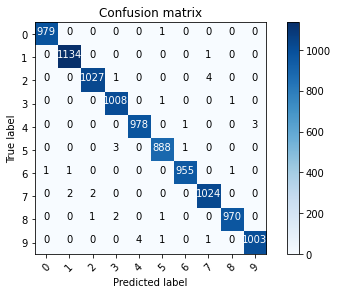

In [57]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

